In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import cv2
import matplotlib.pyplot as plt
from moving_object_detector import MovingObjectDetector
from optical_flow import OpticalFlow
import PIL as pil

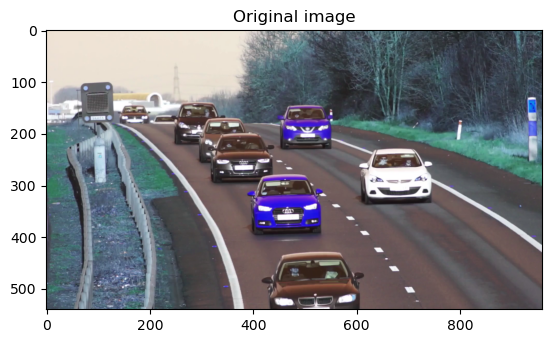

In [31]:
cap = cv2.VideoCapture("../data/videos/cars.mp4")
_, first_frame = cap.read()
_, second_frame = cap.read()

original_image = cv2.resize(second_frame, (0, 0), fx=0.5, fy=0.5)
plt.imshow(original_image)
plt.title("Original image")
plt.show()

# Optical Flow

In [32]:

opt_flow = OpticalFlow()
opt_flow.run(first_frame)
opt_flow_img = opt_flow.run(second_frame)


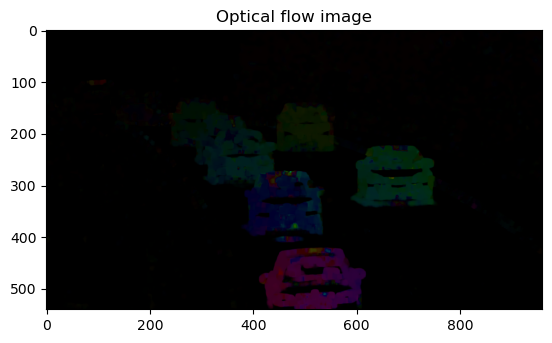

In [33]:
opt_flow_img = cv2.cvtColor(opt_flow_img, cv2.COLOR_HSV2RGB)
img = cv2.resize(opt_flow_img, (0, 0), fx=0.5, fy=0.5)
plt.imshow(img)
plt.title("Optical flow image")
plt.show()

# Moving Object Detector

In [34]:
mod = MovingObjectDetector()
mod.run(first_frame)
mod.run(second_frame)

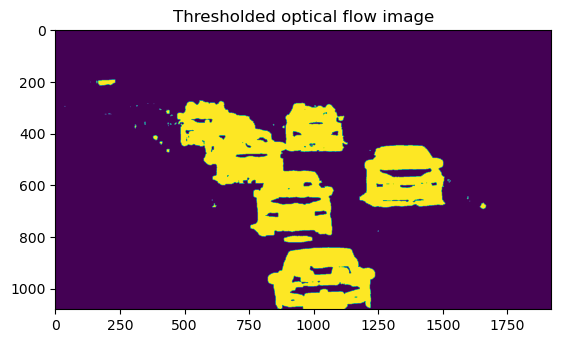

In [35]:
thresholded_image = mod.thresholded_image
img = cv2.resize(thresholded_image, (0, 0), fx=0.5, fy=0.5)
plt.imshow(thresholded_image)
plt.title("Thresholded optical flow image")
plt.show()

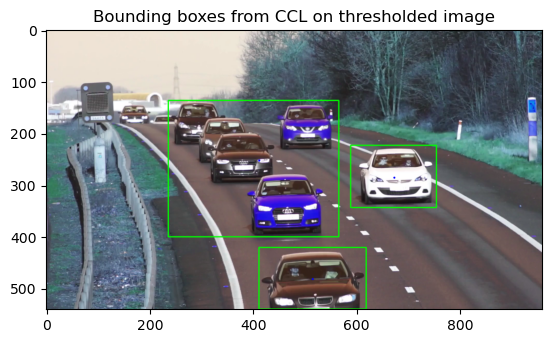

In [37]:
bounding_box_image = mod.get_image_with_bounding_boxes(second_frame)
img = cv2.resize(bounding_box_image, (0, 0), fx=0.5, fy=0.5)
plt.imshow(img)
plt.title("Bounding boxes from CCL on thresholded image")
plt.show()